In [1]:
## packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Practical session 5: missing data, scaling and dimensionality reduction

<div class="alert alert-block alert-info">
    <h2>Table of Contents </h2><a class="anchor" id="top"></a>
    <br><a href="#section_1"> Missing data</a>
    <br><a href="#intermezzo">Intermezzo - Scaling </a>
    <br><a href="#section_2"> Dimensionality reduction </a>
    <br><a href="#Optional">  Optional - Clustering</a>
</div>

<div class="alert alert-block alert-info"> 
 In this practical we will cover how to handle missing data, normalization and dimensionality reduction. At the end of a practical there is an optional part about cluster analysis for those interested. Clustering algorithms are implemented in scikit-learn very similarly as classification or regression algorithms. So you should be able to solve this on your own quite easily. 
 
 
 Last theory lecture also included hyperparameter optimization, but this was already covered during the practical class of Week 3.
</div>

<h2 style="display: inline"> Missing data </h2> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_1"></a> 

<div class="alert alert-block alert-warning">
For reproducibility purposes we will always use random_state=0 in this practical. Don't forget to assign this parameter in your functions if it is needed.
</div>

<div class="alert alert-block alert-warning">
In this practical session, you are expected to write code/complete the statement whenever '...' is written in the code blocks.
</div>

For this part of the practical we will work with the *communities* dataset, which has a large number of features, as well as missing values. It contains demographic information about countries in the United States, and the goal is to predict the number of violent crimes (attribute A122).

In [5]:
# We load the dataset and extract the feature we want to predict
data_dir = "/data/gent/shared/000/gvo00070/BigDataScience2023/"
df = pd.read_csv(data_dir + 'communities.psv', sep = '|', na_values = '?')
X = df.drop("A122", axis=1)
y = df["A122"]

<div class="alert alert-success">
<h3> Exercise:</h3>
<ol> 
 <li>Divide the dataset into a training (80%) and test (20%) set
 <li>For the training set, count the number of attributes with missing values as well as the percentage of missing values
</ol> 

**HINT**: look at how the missing values are represented in the data (their datatype) and remember: google is your best friend 😉
</div>

In [8]:
# Perform the train-test split
...

In [ ]:
# Count the number of attributes with missing values
...

In [ ]:
## Calculate the percentage of missing values
...

<div class="alert alert-success">
<h3> Exercise:</h3>
There are multiple single imputation strategies for missing data implemented in scikit-learn. Perform the following strategies:
<ol> 
 <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">Simple imputation</a> with the mean
 <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">Simple imputation</a> with the median
 <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer">Nearest Neighbor imputation</a> 
</ol> 
Fit for each strategy a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression model </a>and evaluate the model's performance with the R-squared metric.

Each of these methods have a parameter <i>add_indicator</i>. Find out what the purpose of this parameter is and evaluate it's influence on the prediction performance.
</div>

In [ ]:
# Import the packages
...

# Declare the imputation methods
...

# Declare the model
...

# Run the imputators + models
## Without inidicators
...
    
## With indicators
...

# Plot the results
fig, ax = plt.subplots()
ax.scatter(..., ...,  label = 'With indicator' )
ax.scatter(..., ...,  label = 'Without indicator' )
ax.legend()
plt.ylabel('Coefficient of determination')
plt.show()

<h2 style="display: inline"> Intermezzo - Scaling </h2> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="intermezzo"></a> 

As mentioned in the lectures, scaling/normalization is oftentimes quite important as it can heavily influence prediction results. Therefore,  **it is almost always recommended to perform some form of normalization or scaling of the data**, especially when regularization, distance-based classifiers or classifiers with normality/distribution assumptions are implemented. In scikit-learn you have (among others) the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler">RobustScaler</a> available for respectively standardizaton and robust feature scaling. Take a look at <a href=https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-robust-scaler-sectionthis>this link</a> to get an understanding of all the possible scalers implemented in scikit-learn.

But do note, that in order to prevent data leakage, **scaling can only be based on the training dataset characteristics**. As the model is trained on scaled features, for a proper prediction the test data will also need to be on the same scale. But the test data can only be scaled based on the training data's characteristics, not on its own characteristics. *E.g. for standardization, the mean and variance of the training data will be calculated and used for transformation of the entire dataset.*

Worthwhile to mention here is also the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html"> pipeline constructor </a> in scikit-learn. This constructor allows you to sequentially perform multiple scikit-learn transform actions and one final estimation action.

So for instance say you would want to perform a scaling transformation and then fit a linear SVM model, with the help of the pipeline constructor this can be efficiently implemented:

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

# Construct a toy classification dataset
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

# Construct a pipeline with a scaler and a svc step
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])  

# This pipeline can be used as any other constructor in scikit-learn
pipe.fit(X_train, y_train)

# The pipeline will inherit the scoring method from the final estimator
# Scaling will only be trained on the train dataset, but the test data will also be transformed
pipe.score(X_test, y_test) 

In [ ]:
# You can access the independent steps
pipe['scaler'].mean_

Feature selection methods are also considered transformations in scikit-learn and can thus be incorporated in the pipeline structure, similarly as the scaling operations. You can find an overview of the feature selection methods implemented in scikit-learn <a hred = "https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection">here</a>

<h2 style="display: inline"> Dimensionality reduction </h2> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="section_2"></a> 

Dimensionality reduction is an important tool in data science, it performs a transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data. These properties vary with each algorithm.

**Principal component analysis (PCA)** might be the most known dimensionality reduction method. It's goal is to project the data to a lower dimension coordinate system by preserving as much variance in the data as possible. The (new) axes of the lower dimensional data are then called principal components (PCs)

**Linear Discriminant analysis** (introduced during week 3 as a classifier) can also be used as a dimensionality reduction method, but its objective for dimension reduction is not maximizing variance, but finding the lower dimensional space that best separates the classes present in the data.

![CV](./PCA_LDA.png)

Many other exist, such as **UMAP**,  **t-SNE**, **MDS** etc.

Dimensionality reduction is used within data science for two purposes:
<ol>
    <li> <i>Data visualisation</i>
    <li> <i>Feature reduction</i>
</ol>


For this part of the practical we will make use of *the Winconsin Diagnostic Breast Cancer (wdbc)* dataset that can be used to classify tumors as benign or malignant.

In [43]:
data_dir = "/data/gent/shared/000/gvo00070/BigDataScience2023/"
df = pd.read_csv(data_dir + 'wdbc.psv', sep = '|', na_values = '?')
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# X (uncomment this if you are interested in the contents of X)

<div class="alert alert-success">
<h3> Exercise:</h3>
<ol>
    <li> Perform <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html">5-fold CV</a>
    <li> Scale the data 
    <li> Perform a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a> transformation and make sure 85% of the variation is retained in the lower dimension
    <li> Classify the data with a <a href="https://sci>kit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">Decision tree classifier</a>
    <li> Evaluate the model with the mean <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score">accuracy score</a>
    <li> Plot the first PCs against each other colored by class label (<b>HINT</b>: you can access the fitted objects in the pipeline)
<ol>
</div>

In [ ]:
# Import the required packages
...

# Declare the K-fold constructor
...

# initialize an array to store the accuracy per fold
acc = np.zeros(5)

# Perform 5-fold CV
for i, (train_index, test_index) in enumerate(...):
    # Per split, construct the training and test data
    X_train = X.values[train_index]
    X_test= ...
    y_train = y.values[train_index]
    y_test = ...
    
    # Declare the pipeline constructor
    ...
    
    # Fit and evaluate the pipeline
    ...

    # Measure and store the accuracy per fold
    acc[i] = ...


print('mean accuracy score', np.mean(acc))


In [ ]:
# Scale the training data
...
# Extract the first three dimensions of the transformed and scaled training data
pc_0 = ...
pc_1 = ...
pc_2 = ...


# Scale the test data
...
# Extract the first three dimensions of the transformed test data
pc_0_test = ...
pc_1_test = ...
pc_2_test = ...
# Indicate a coloring dictionary
color = {
    'M': 'red',
    'B': 'blue'
}
color_groups = [color[i] for i in y_train]
color_groups_test = [color[i] for i in y_test]

# Plot the first two PCs against each other and color the points by the classes in the data
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].scatter(..., ..., c = ...)
ax[0].set_title('PC0-PC1 Train')
ax[0].set_xlabel('PC 0')
ax[0].set_ylabel('PC 1')

ax[1].scatter(..., ..., c = ...)
ax[1].set_title('PC0-PC1 Test')
ax[1].set_xlabel('PC 0')
ax[1].set_ylabel('PC 1')

In [ ]:
# Plot the second and thirs PC against each other and color the points by the classes in the data
...

<h2 style="display: inline"> Optional - Clustering </h2> <span style="float: right"><a href="#top">[back to top]</a></span> <a class="anchor" id="Optional"></a> 

<div class="alert alert-success">
<h3> Exercise:</h3>
<ol>
    <li> Split the data in a training (80%) and test (20%) set
    <li> Classify the data with a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">Kmeans</a> and test out some different <i>n_cluster</i> parameters 
    <li> Visualize the predictions of the different models
<ol>
</div>

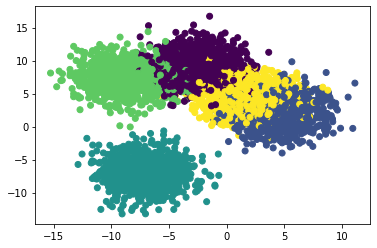

In [121]:
# Generate some toy data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=5000,
  centers=5,
  cluster_std=2,
  random_state=42
 )
plt.scatter(X[:,0], X[:,1], c = y)

In [ ]:
# Import the required packages
...

# Split the data
...

# Declare the n_cluster paramters 
...

# Fit a model per parameter and visualize the models' predictions
...
